In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

from sklearn import preprocessing, svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn_extra.cluster import KMedoids
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential



C:\Users\irina\AppData\Local\Temp\ipykernel_35192\2026407533.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Variables in dataset

- age - float - 40 to 95
- anaemia - int - 0/1 with threshold Hct 36% - converts to 120 g/L 
- creatinine_phosphokinase (CK) - int
- diabetes - int - 0/1 
- ejection_fraction - int
- high_blood_pressure - int - 0/1, not defined 
- platelets - float
- serum_creatinine (Cr) - float - unit is mg/dL instead of usual micromol/L 
- serum_sodium (Na) - int
- sex - int - 0/1 with 1 male, 0 female
- smoking - int - 0/1 
- time - int - time for follow-up in days
- death_event - 1 for dead, 0 for alive 

# Variable relationships to explore

- sex and survival
- age and survival
- age, sex and survival
- anaemia
- CK
- diabetes
- HTN
- platelets 
- Cr
- smoking

In [28]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## check it's reading as a df
type(data)

pandas.core.frame.DataFrame

In [3]:
## check layout
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
## check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
## check values and counts
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
## check for any missing values 
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EDA

## Piechart of M/F 

In [7]:
# Can we make a function to count things?

def count(data, column):
    # return df that has the count by column of data 
    total_by_column = data.groupby([column]).size().reset_index(name=f'total_{column}_counts')
    return total_by_column


In [8]:
count_gender = count(data, 'sex')

count_gender

,sex,total_sex_counts
0,0,105
1,1,194


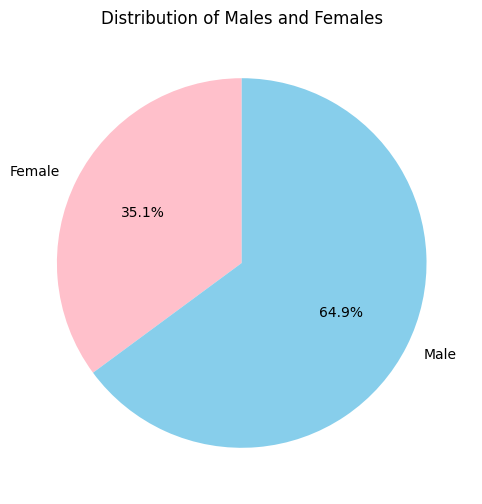

In [9]:
## Count males and females 
total_by_sex= data.groupby(['sex']).size().reset_index(name='total_sex_counts')

# Create a pie chart for the total counts of males and females
plt.figure(figsize=(6, 6))
plt.pie(total_by_sex['total_sex_counts'], labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['pink', 'skyblue'])
plt.title('Distribution of Males and Females')
plt.show()

## ax - Countplot of M/F in relation to survival

In [10]:
## make a function to add the count above a bar in a barplot
def annotate_bars(ax):
    ## annotate height of each bar in a bar plot 
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points'
        )

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\2640766764.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Survived', 'Dead'])


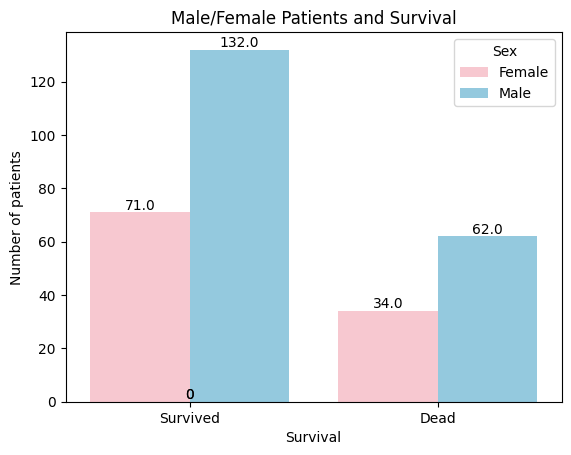

In [11]:
## let's look at survival as it relates to sex

custom_palette = ['pink', 'skyblue']
sns.set_palette(custom_palette)

ax = sns.countplot(x='DEATH_EVENT', hue='sex', data=data)

plt.title('Male/Female Patients and Survival')
plt.xlabel('Survival')
plt.ylabel('Number of patients')

## change legend labels
legend_labels = ['Female', 'Male']
ax.legend(legend_labels, title='Sex')

## change x labels 
ax.set_xticklabels(['Survived', 'Dead'])

annotate_bars(ax)


This shows us there are less females in this study - 105F and 194M 
This could skew the data - are there more men recruited because they are more likely to develop CV disease or did it happen to be the case in this population? 

Note: We know being male is a RF for CVD 

# ax1 - Countplot of Age-Group and Sex

In [12]:
## define age bins and labels 
age_bins = [40, 50, 60, 70, 80, 90, 100]
labels = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

## make new column with age_bins
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=labels, right=False)

## count people in each age group
age_count = data['age_group'].value_counts().sort_index()

age_count

age_group
40-50     47
50-60     82
60-70     93
70-80     52
80-90     19
90-100     6
Name: count, dtype: int64

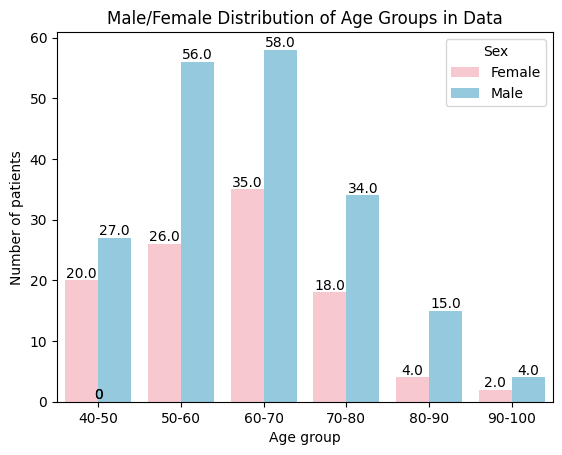

In [13]:
## Set the palette with custom colors
custom_palette = ['pink', 'skyblue']
sns.set_palette(custom_palette)

## create a countplot according to gender and age group
ax1 = sns.countplot(x='age_group', hue='sex', data=data)

plt.title('Male/Female Distribution of Age Groups in Data')
plt.xlabel('Age group')
plt.ylabel('Number of patients')

## add count above bars
annotate_bars(ax1)

## change legend labels
legend_labels = ['Female', 'Male']
ax1.legend(legend_labels, title='Sex')

plt.show()

## most patients are males between 50-70 

# Anaemia vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\269882161.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Survived', 'Dead'])


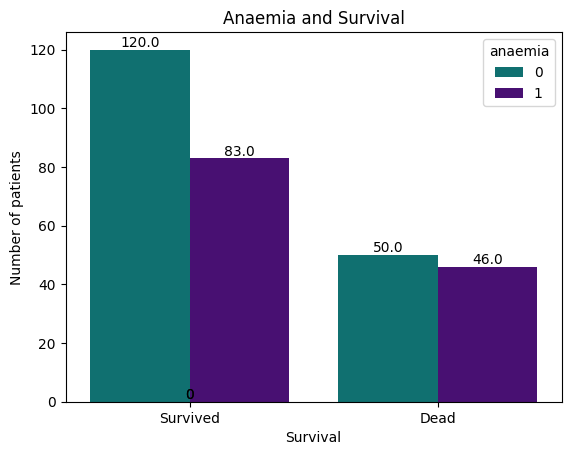

In [14]:
custom_palette = ['teal', 'indigo']
sns.set_palette(custom_palette)

ax = sns.countplot(x='DEATH_EVENT', hue='anaemia', data=data)

plt.title('Anaemia and Survival')
plt.xlabel('Survival')
plt.ylabel('Number of patients')

## change x labels 
ax.set_xticklabels(['Survived', 'Dead'])

annotate_bars(ax)

# CK vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\2824625879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=data, palette='viridis')


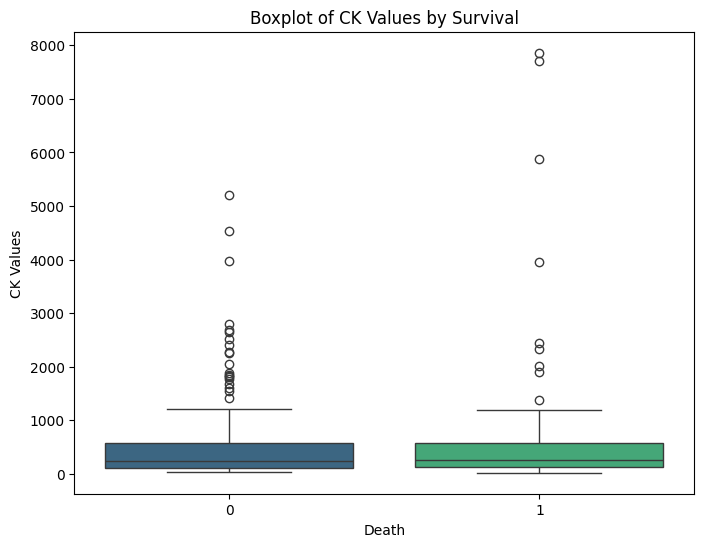

In [15]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='creatinine_phosphokinase', data=data, palette='viridis')

# Customize the plot
plt.title('Boxplot of CK Values by Survival')
plt.xlabel('Death')
plt.ylabel('CK Values')

# Show the plot
plt.show()

# Diabetes vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\1552797358.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Survived', 'Dead'])


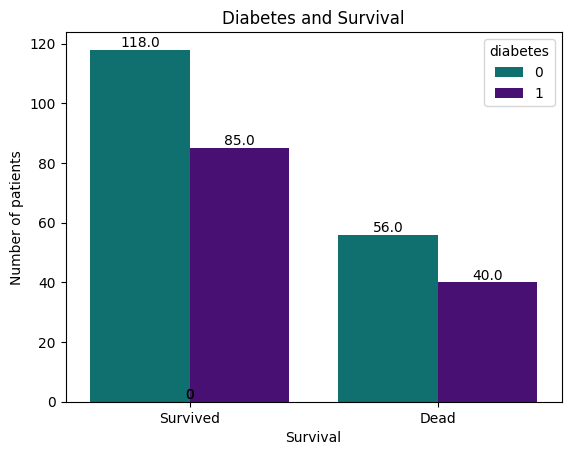

In [16]:
custom_palette = ['teal', 'indigo']
sns.set_palette(custom_palette)

ax = sns.countplot(x='DEATH_EVENT', hue='diabetes', data=data)

plt.title('Diabetes and Survival')
plt.xlabel('Survival')
plt.ylabel('Number of patients')

## change x labels 
ax.set_xticklabels(['Survived', 'Dead'])

annotate_bars(ax)

# EF vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\4170955275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data, palette='viridis')


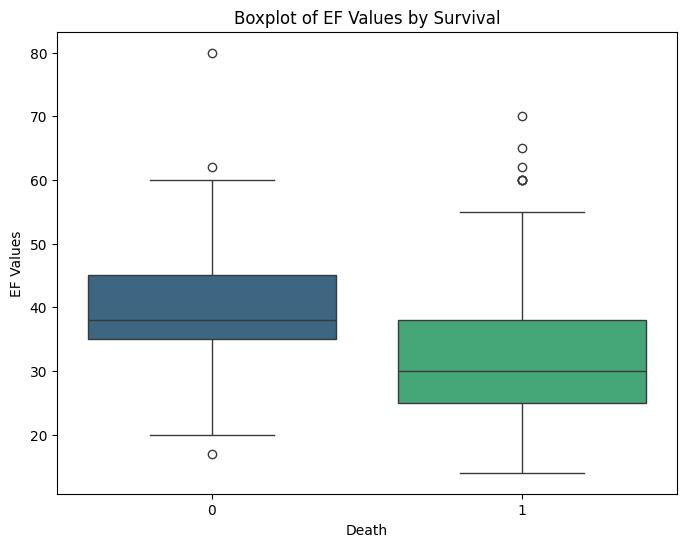

In [17]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data, palette='viridis')

# Customize the plot
plt.title('Boxplot of EF Values by Survival')
plt.xlabel('Death')
plt.ylabel('EF Values')

# Show the plot
plt.show()

# Platelets vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\321799882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='platelets', data=data, palette='viridis')


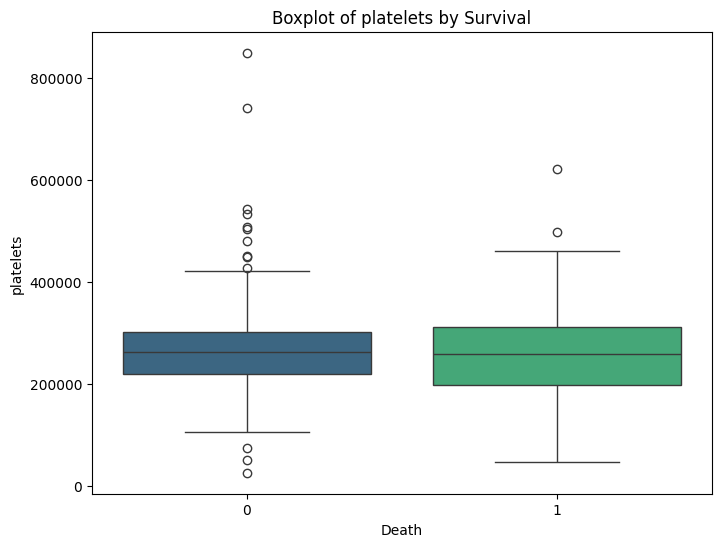

In [18]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='platelets', data=data, palette='viridis')

# Customize the plot
plt.title('Boxplot of platelets by Survival')
plt.xlabel('Death')
plt.ylabel('platelets')

# Show the plot
plt.show()

# HTN vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\3511103846.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Survived', 'Dead'])


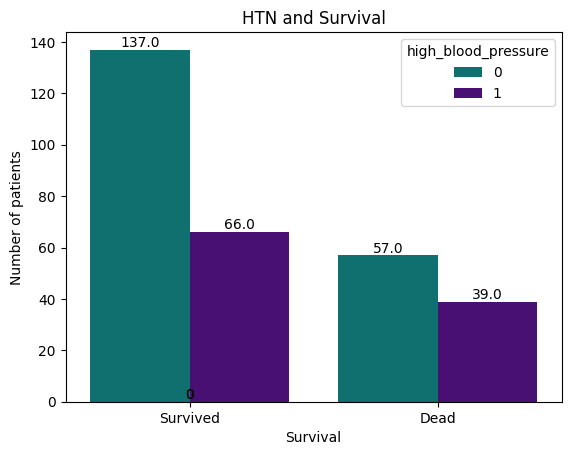

In [19]:
custom_palette = ['teal', 'indigo']
sns.set_palette(custom_palette)

ax = sns.countplot(x='DEATH_EVENT', hue='high_blood_pressure', data=data)

plt.title('HTN and Survival')
plt.xlabel('Survival')
plt.ylabel('Number of patients')

## change x labels 
ax.set_xticklabels(['Survived', 'Dead'])

annotate_bars(ax)

# Cr vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\1750848392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data, palette='viridis')


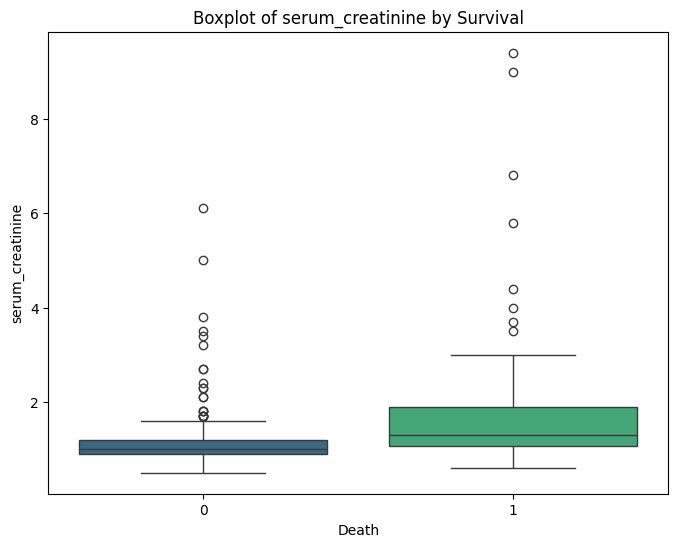

In [20]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data, palette='viridis')

# Customize the plot
plt.title('Boxplot of serum_creatinine by Survival')
plt.xlabel('Death')
plt.ylabel('serum_creatinine')

# Show the plot
plt.show()

# Na vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\1731852430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=data, palette='viridis')


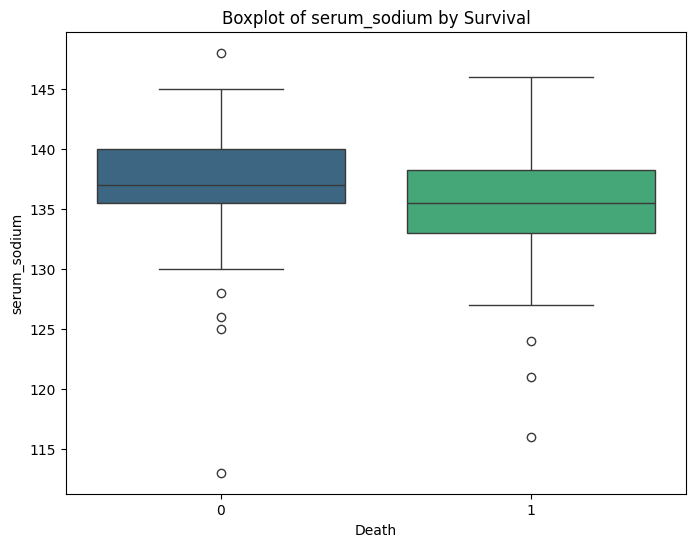

In [21]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=data, palette='viridis')

# Customize the plot
plt.title('Boxplot of serum_sodium by Survival')
plt.xlabel('Death')
plt.ylabel('serum_sodium')

# Show the plot
plt.show()

# Smoking vs Survival

C:\Users\irina\AppData\Local\Temp\ipykernel_35192\8257383.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Survived', 'Dead'])


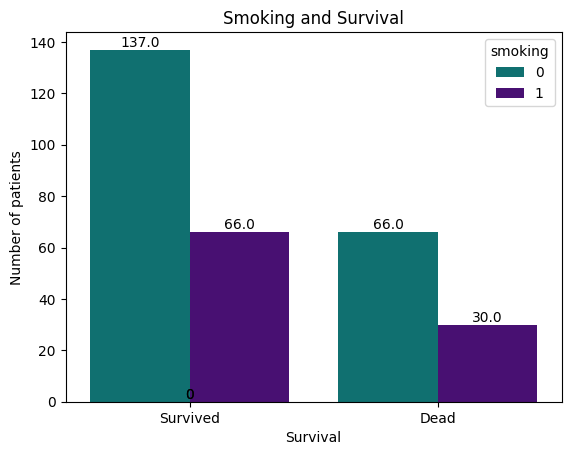

In [22]:
custom_palette = ['teal', 'indigo']
sns.set_palette(custom_palette)

ax = sns.countplot(x='DEATH_EVENT', hue='smoking', data=data)

plt.title('Smoking and Survival')
plt.xlabel('Survival')
plt.ylabel('Number of patients')

## change x labels 
ax.set_xticklabels(['Survived', 'Dead'])

annotate_bars(ax)

In [23]:
## make a function to count and plot pie chart
def count_and_pie_chart(data, column):
    # Count by column
    total_by_column = data.groupby([column]).size().reset_index(name=f'total_{column}_counts')

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(total_by_column[f'total_{column}_counts'], labels=total_by_column[column], autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution by {column.capitalize()}')
    plt.show()

In [26]:
## df needs to be reloaded here! (we don't want the age buckets)

pandas.core.frame.DataFrame

# Correlation heatmap

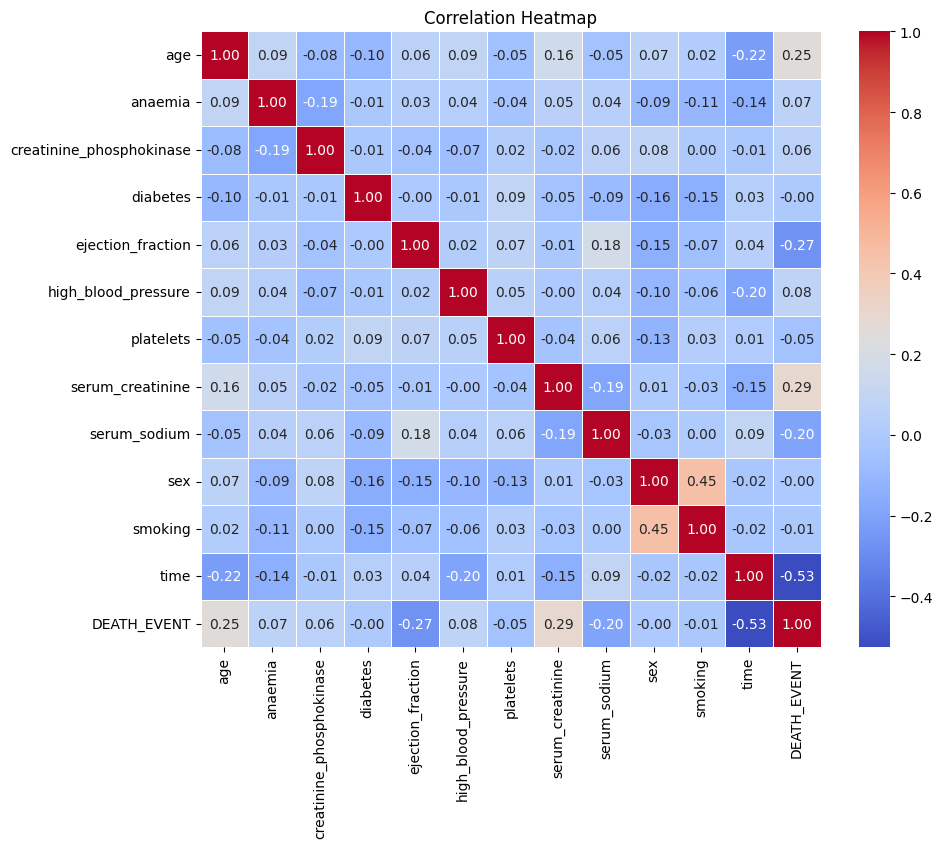

In [29]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


# Models

- dimensionality reduction? we don't have that many features so we don't need to do this
- standardise data as they are all very different

In [30]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [31]:
## define independent and dependent variables 
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)

## Standardise data

In [32]:
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

## Logistic Regression

In [33]:
## train logistic regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

##  make LR prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [34]:
## calculate accuracy and confusion matrix
accuracy_LR = accuracy_score(y_test, pred_LR)
conf_mat_LR =  confusion_matrix(y_test,pred_LR )

print(accuracy_LR)
print(conf_mat_LR)

0.85
[[37  4]
 [ 5 14]]


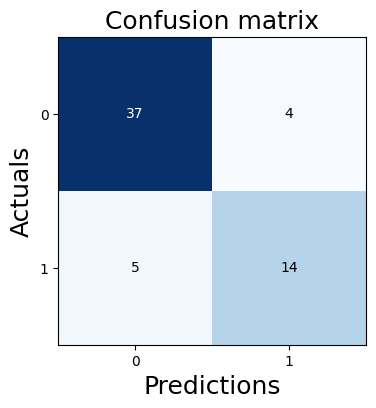

In [35]:
fig, ax2 = plot_confusion_matrix(conf_mat=conf_mat_LR, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## TP 37, FP 4
## FN 5, TN 14

## Naive Bayes

In [37]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [38]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


In [39]:
## calculate accuracy and confusion matrix
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.75
[[35  6]
 [ 9 10]]


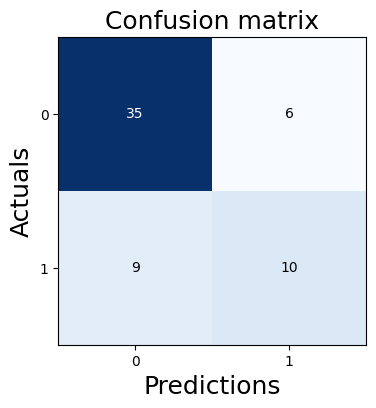

In [40]:
fig, ax3 = plot_confusion_matrix(conf_mat=conf_mat_NB, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## TP 35, FP 6
## FN 9, TN 10

AUC: 0.819641


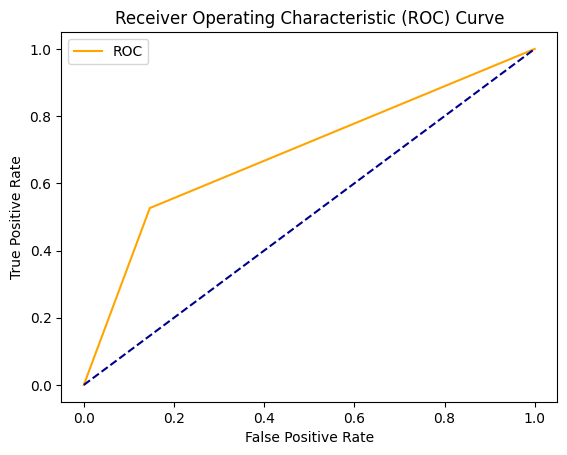

In [41]:
auc_mod = roc_auc_score(y_test, pred_LR)
print('AUC: %f' %auc_mod)

fpr, tpr, _ = roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## kNN

In [42]:
## build kNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
## make prediction
y_pred_knn = knn_model.predict(X_test)

In [44]:
## calculate accuracy and confusion matrix
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_NB)
print(conf_mat_NB)

0.75
[[35  6]
 [ 9 10]]


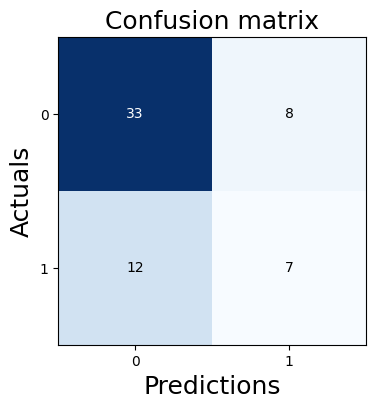

In [45]:
fig, ax4 = plot_confusion_matrix(conf_mat=conf_mat_knn, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## Decision Tree Classifier

In [46]:
## default Decision Tree
decisionTree_model_gini = DecisionTreeClassifier()

## entropy decision tree
decisionTree_model_entropy = DecisionTreeClassifier(criterion='entropy')

## max depth 3 decision tree
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

In [47]:
## Fit models
decisionTree_model_gini.fit(X_train, y_train)
decisionTree_model_entropy.fit(X_train, y_train)
decisionTree_model_depth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
# Make predictions
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

In [49]:
## calculate accuracy and confusion matrix
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)


print(accuracy_gini)
print(conf_mat_gini)

0.7666666666666667
[[33  8]
 [ 6 13]]


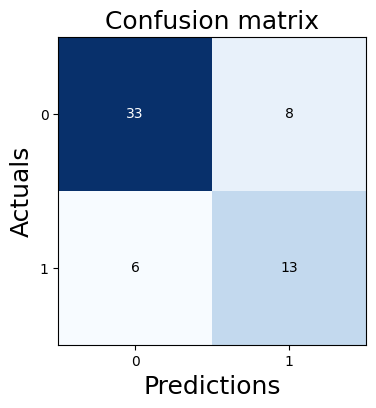

In [50]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_gini, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

In [51]:
## calculate accuracy and confusion matrix
accuracy_entropy = accuracy_score(y_test, y_pred_gini)
conf_mat_entropy = confusion_matrix(y_test, y_pred_entropy)


print(accuracy_entropy)
print(conf_mat_entropy)

0.7666666666666667
[[33  8]
 [ 5 14]]


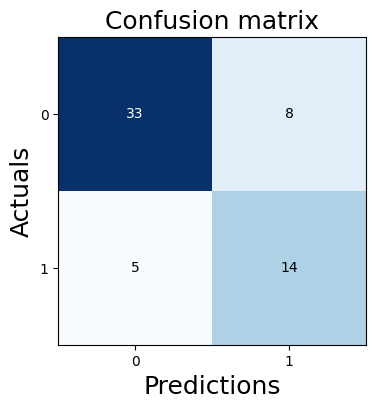

In [52]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_entropy, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

In [53]:
## calculate accuracy and confusion matrix
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)
conf_mat_depth3 = confusion_matrix(y_test, y_pred_depth3)


print(accuracy_depth3)
print(conf_mat_depth3)

0.7833333333333333
[[32  9]
 [ 4 15]]


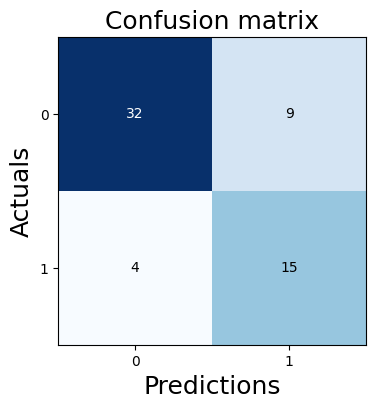

In [54]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_depth3, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

## SVM

In [55]:
## create 3 svm classifiers
linear_SVM = svm.SVC(kernel='linear')
sigmoid_SVM = svm.SVC(kernel='sigmoid')
rbf_SVM = svm.SVC(kernel='rbf')

## train model on our data
linear_SVM.fit(X_train, y_train)
sigmoid_SVM.fit(X_train, y_train)
rbf_SVM.fit(X_train, y_train)

SVC()

In [56]:
## predict 
y_pred_linear = linear_SVM.predict(X_test)
y_pred_sigmoid = sigmoid_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

In [57]:
## calculate accuracy and confusion matrix
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)


print(accuracy_linear)
print(conf_mat_linear)

0.8333333333333334
[[37  4]
 [ 6 13]]


AUC: 0.793325


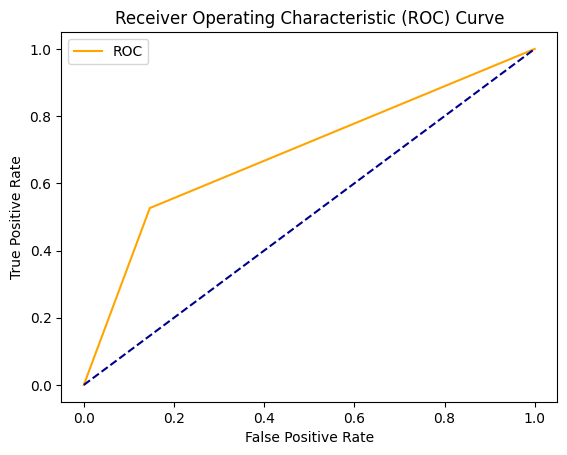

In [58]:
auc_mod = roc_auc_score(y_test, y_pred_linear)
print('AUC: %f' %auc_mod)

fpr, tpr, _ = roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

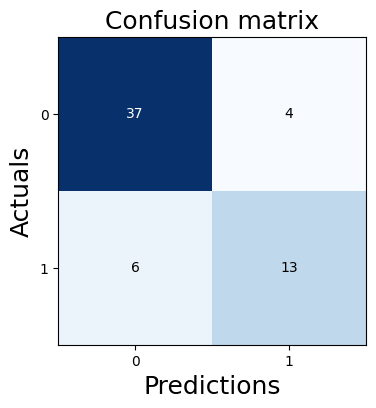

In [59]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_linear, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

In [60]:
## calculate accuracy and confusion matrix
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)


print(accuracy_sigmoid)
print(conf_mat_sigmoid)

0.8
[[36  5]
 [ 7 12]]


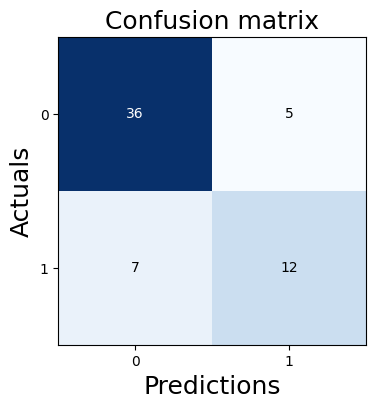

In [61]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_sigmoid, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

In [62]:
## calculate accuracy and confusion matrix
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)


print(accuracy_rbf)
print(conf_mat_rbf)

0.75
[[34  7]
 [ 8 11]]


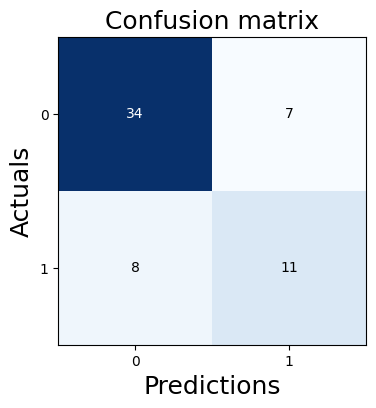

In [63]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_rbf, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion matrix', fontsize = 18)
plt.show()

# Neural Network

In [65]:
## initialise neural network 
model = Sequential()

## set up input layer
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12)) ## Dense means that all the 'neurons' in this layer are connected 
## units is the number of 'neurons' in this initial layer

## hidden layer 1
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

## hidden layer 2
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

## regularisation
model.add(Dropout(0.25))

## output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

## compile network
## optimiser -- adam, sgd - stochastic gradient descent, rmsprop-- root mean square propagation 
## binary classification -- binary_cross_entropy, multi class classification -- categorical_cross_entropy
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [66]:
## train network
history = model.fit(X_train, y_train, batch_size=120, epochs=20, validation_split=0.20)

Epoch 1/20


2/2 [==============================] - 1s 255ms/step - loss: 0.6931 - accuracy: 0.6702 - val_loss: 0.6926 - val_accuracy: 0.7500
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 0.6927 - accuracy: 0.6597 - val_loss: 0.6920 - val_accuracy: 0.7500
Epoch 3/20
2/2 [==============================] - 0s 38ms/step - loss: 0.6924 - accuracy: 0.6597 - val_loss: 0.6915 - val_accuracy: 0.7500
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 0.6921 - accuracy: 0.6597 - val_loss: 0.6910 - val_accuracy: 0.7500
Epoch 5/20
2/2 [==============================] - 0s 37ms/step - loss: 0.6916 - accuracy: 0.6597 - val_loss: 0.6904 - val_accuracy: 0.7500
Epoch 6/20
2/2 [==============================] - 0s 38ms/step - loss: 0.6913 - accuracy: 0.6597 - val_loss: 0.6899 - val_accuracy: 0.7500
Epoch 7/20
2/2 [==============================] - 0s 36ms/step - loss: 0.6910 - accuracy: 0.6597 - val_loss: 0.6893 - val_accuracy: 0.7500
Epoch 8/20
2/2 [========

In [67]:
## save the network
model.save('cvd.h5')

C:\Users\irina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
## load the file
cvd_model = tf.keras.models.load_model('cvd.h5')

In [98]:
## make prediction
y_pred_ann = cvd_model.predict(X_test)
y_pred_ann

2/2 [==============================] - 0s 3ms/step


array([[0.48718497],
       [0.48692942],
       [0.4866097 ],
       [0.48750964],
       [0.48811832],
       [0.4871737 ],
       [0.4881169 ],
       [0.48569402],
       [0.48792234],
       [0.48742193],
       [0.48692074],
       [0.48791832],
       [0.4880462 ],
       [0.48913667],
       [0.4877536 ],
       [0.48753148],
       [0.4879052 ],
       [0.4879255 ],
       [0.48752895],
       [0.48769855],
       [0.4876152 ],
       [0.48894483],
       [0.4878095 ],
       [0.48719373],
       [0.48870847],
       [0.4872049 ],
       [0.48725086],
       [0.4888445 ],
       [0.4882886 ],
       [0.48725784],
       [0.48823473],
       [0.48709205],
       [0.48898956],
       [0.48730132],
       [0.48901486],
       [0.48758742],
       [0.4874402 ],
       [0.48738348],
       [0.48691434],
       [0.48897773],
       [0.48858884],
       [0.4881365 ],
       [0.4875283 ],
       [0.4876287 ],
       [0.4891126 ],
       [0.48726   ],
       [0.48851922],
       [0.489

In [99]:
y_pred_ann = np.where(y_pred_ann > 0.5, 1,0)
y_pred_ann

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [100]:
print(y_test.shape)
print(y_pred_ann.shape)

(60,)
(60, 1)


In [94]:
# flatten the y_pred
y_pred_ann= y_pred_ann.flatten()

In [95]:
pd.DataFrame( {'Actual': y_test,
               'Predicted': y_pred_ann})

,Actual,Predicted
0,0,1
1,0,1
2,0,1
3,1,1
4,0,1
5,0,1
6,0,1
7,0,0
8,0,1
9,0,1


In [101]:
## classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



C:\Users\irina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\irina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\irina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [ ]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)

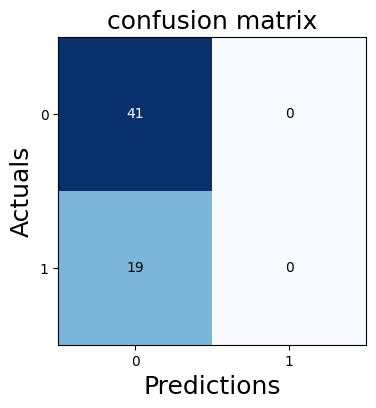

In [ ]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()

AUC: 0.500000


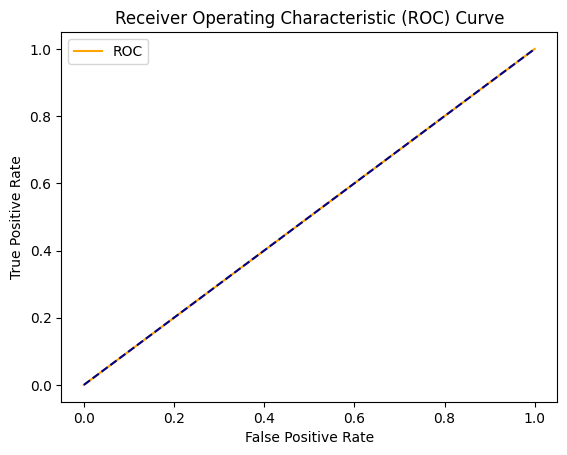

In [ ]:
auc_mod2 = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod2)

fpr, tpr, _= roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

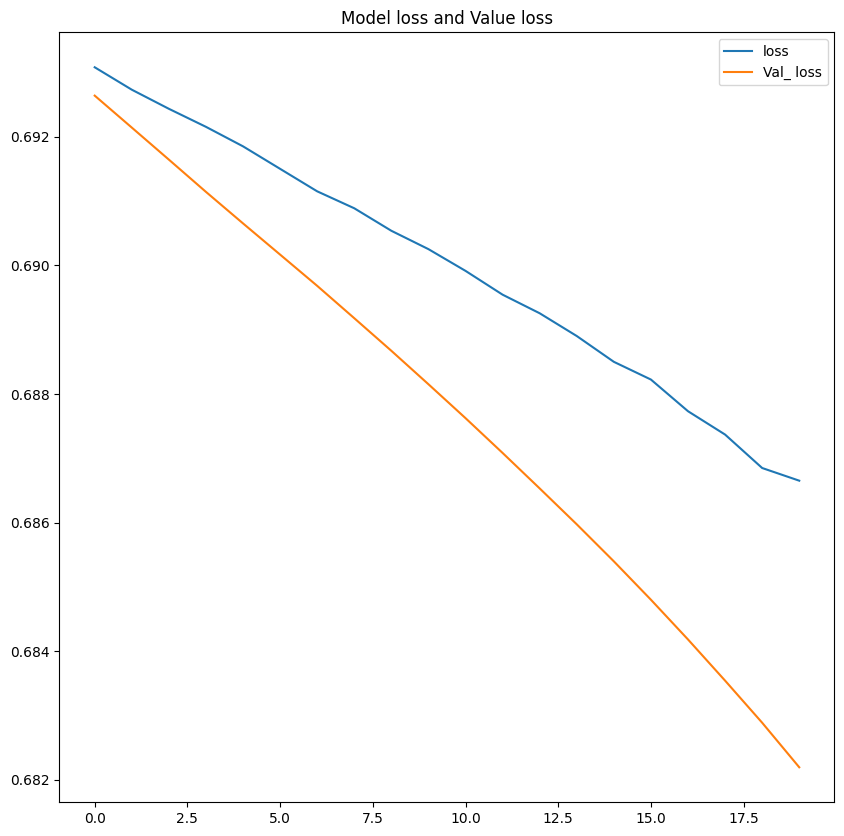

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'Val_ loss')
plt.title('Model loss and Value loss')
plt.legend()
plt.show()